<a href="https://colab.research.google.com/github/SERVIR/flood_mapping_intercomparison/blob/main/notebooks/Module_7_Accuracy_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

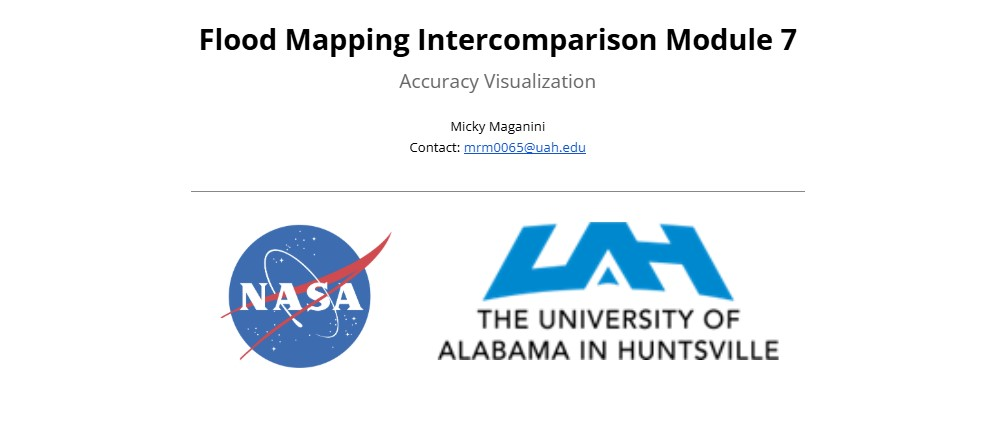

# Introduction

In Module 6, we obtained a CSV containing metrics derived from confusion matrices of various flood events. In this module, we will visualize those metrics for different events, and for different subpopulations of the events (e.g. for different slope regimes, and for different land cover types).

### MODIFIABLE VARIABLE ALERT

Change the variables below to match the CSV file where you wrote your statistics to

In [ ]:
# This string needs to end in .csv
my_csv= 'gfip_master_stats_modded.csv'

In [ ]:
# Import Relevant Packages
import pandas as pd
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt
import os

In [ ]:
# Mount Google Drive
drive.mount('/content/drive/')

In [ ]:
# Choose the "My Drive" folder in Google Drive.
os.chdir('drive/My Drive')

In [ ]:
# Use pandas to read your reference data csv
df = pd.read_csv(my_csv)

# Part 1: All Points, All Stats

First, we will plot our metrics for all reference data points. Then we will visualize our metrics for different subsets of the data.

In [ ]:
# Subset the data to statistics representing all land cover classes, all slope classes, and all land covers
subset = df[df['Elevation_Class'] == 'All']
subset2 = subset[subset['Slope_Class'] == 'All']
all_lcs_sl_el = subset2[subset2['Land_Cover'] == 'All']

all_lcs_sl_el_accuracy = all_lcs_sl_el[all_lcs_sl_el['Statistic'] == 'Overall Accuracy']

In [ ]:
#all_lcs_sl_el.shape

Let's define a function that will allow us to visualize different statistics in different ways

In [ ]:
def plot_func(subset, plot_min, axis_label, order1, group_by='Flood_Event', chart_type = 'barplot'):
  '''
  plot_func function will plot visualize different statistics via a plot
  subset = a pandas dataframe containing the data you want to plot
  plot_min = a value between 0 and 1 (e.g. 0.5). The plot will use this as the minimum y value
  axis_label = a string that will be used as the label for the y-axis
  order1 = a list of strings that contains the order of the statistics to plot.
  group_by = how the bars or dots will be grouped. Can be 'Flood_Event', 'Statistic', 'Slope', 'Land Cover'
  chart_type = 'barplot' or 'stripplot'. Changes whether the plot will be bars or dots.
  '''

  # Set the style for the plot
  sns.set_style('whitegrid')

  # Group by logic
  if group_by == 'Statistic':
    group = 'Statistic'
    this_x = 'Flood_Event'
  if group_by == 'Flood_Event':
    group = 'Flood_Event'
    this_x = 'Statistic'
  if group_by == 'Land_Cover':
    group = 'Flood_Event'
    this_x = 'Land_Cover'
  if group_by == 'Slope':
    group = 'Flood_Event'
    this_x = 'Slope_Class'

  # Create a figure
  fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20,10), sharey = True)
  axes = axes.flatten()

  # Define the groups based on the group_by parameter
  my_groups = subset[group].unique()
  print(my_groups)

  ####################### Bar Plot #########################################
  if chart_type == 'barplot':
    sns.set_style('whitegrid')

    # for each group, construct a bar plot of different statistics
    for p, this_group in enumerate(my_groups):
      this_subset = subset[subset[group] == this_group]

      # get the subplot of interest
      this_ax = axes[p]

      # Construct barplot
      sns.barplot(data = this_subset,
                    x = this_x,
                    y = 'Value',
                    hue = 'Product',
                    palette = 'colorblind',
                    hue_order = order1,
                    ax = this_ax)

      # Set the minimum y value
      this_ax.set_ylim([plot_min, 1])

      # labelling and legends
      this_ax.set_xlabel("")
      this_ax.set_ylabel(axis_label)
      this_ax.get_legend().remove()
      this_ax.set_title(f'{this_group}')

      #Vertical Divider in between grouped bars
      xticks = this_ax.get_xticks()
      for m in range(1, len(xticks)):
        this_ax.axvline(x=(xticks[m] + xticks[m-1])/2, color='gray', linestyle = '--', alpha = 0.4)

  ########################### STRIP PLOT ##################################################
  if chart_type == 'stripplot':
    for k, this_group in enumerate(my_groups):
      this_subset = subset[subset[group] == this_group]
      this_ax = axes[k]                                      # Get subplot of interest

      sns.stripplot(data = this_subset,                      # Make stripplot
                    x = this_x,
                    y = 'Value',
                    hue = 'Product',
                    dodge = True,
                    size = 12,
                    palette = 'colorblind',
                    hue_order = order1,
                    ax = this_ax)

      # Make the plot look nice
      this_ax.set_ylim([plot_min, 1])
      this_ax.set_ylabel(axis_label)
      this_ax.set_xlabel("")
      this_ax.get_legend().remove()
      this_ax.set_title(f'{this_group}')

      #Vertical Divider in between grouped bars
      xticks = this_ax.get_xticks()
      for m in range(1, len(xticks)):
        this_ax.axvline(x=(xticks[m] + xticks[m-1])/2, color='gray', linestyle = '--', alpha = 0.4)

  ######################### GENERAL PLOTTING ##############################################
  handles, labels = axes[0].get_legend_handles_labels()

  fig.legend(handles, labels, loc= 'center right', bbox_to_anchor=(0.85, 0.25), fontsize = 'xx-large')
  fig.delaxes(axes[-1])
  plt.show()

# Part 1 Step 1: Seaborn's Strip Plot

Using Seaborn's strip plot and subplots within a for loop, we can generate grouped visualizations of the performance metric. Each subplot will be a different metric (e.g. accuracy, precision, etc), and each group of points will be a different case study.

In [ ]:
# Define a custom order so that all plots show the same product with the same color and location.
my_order = ['DSWx-S1', 'DSWx-HLS', 'GFM', 'HYDRAFloods', 'HYDROSAR', 'MCDWD', 'VFM']

In [ ]:
# Run the plot_func function for all reference data points using strip plot
plot_func(all_lcs_sl_el, 0, 'Value', my_order, group_by = 'Statistic', chart_type='stripplot')

## Part 1 Step 2: Seaborn's Bar Plot

Now let's try the same visualization, this time using Seaborn's Barplot function. This will be the same data, just with a slightly different representation

In [ ]:
plot_func(all_lcs_sl_el, 0.7, 'Value', my_order, group_by = 'Statistic', chart_type='barplot')

For the rest of this module, we will use Seaborn's barplot, as it is a little easier to remember which dot/bar corresponds to which product.

Some observations for the above statistics are shown below.
* Accuracy
  * DSWx-HLS has the highest accuracy for 3 out of 5 case studies and the 2nd highest for another
  * Dswx-S1 has the lowest accuracy for 2 of the 4 case studies it was available for
  * All products show decent to good accuracies, between ~ 0.79 - 0.95
* Precision
  * DSWx-HLS has the highest precision for 4 out of 5 of the case studies, and the 2nd highest precision for the 5th case study
    * For two case studies, DSWx-HLS has a precision of 0.2 greater than the next best product
  * VFM has the lowest precision for 2 of 5 case studies
  * Optical products have a higher precision for the Arkansas Case Study than SAR products, despite two of the optical products having much worse spatial resolutions
* Recall
  * HYDRAFloods had the best recall for three out of five case studies, and the second best recall for the additional two case studies
  * DSWx-HLS showed poor recall in Chad and Pakistan
  * DSWx-S1 showed very poor recall in Chad
* F1 score
  * HYDRAFloods showed the best F1 score in three of five case studies, and the second best F1 score in an additional case study.
  * DSwx-S1 showed the lowest F1 score in two of the four case studies it was avilable for
  * DSWx-HLS had the highest F1 score for two of five case studies, but the 2nd lowest f1 score for two other case studies (Chad and Pakistan)
* NMCC
  * HYDRAFloods had the best NMCC for three of the five case studies
  * DSWx-HLS had the best NMCC for the other two case studies (Arkansas and Florida)
  * DSWx-S1 had the lowest NMCC for two of the four case studies it was available for.
* Low spatial resolution products perform comparably to high spatial resolution products in a point-based assessment


Now, let's use a different flood event for each subplot, and group the stats by flood event rather than statistic.

In [ ]:
plot_func(all_lcs_sl_el, 0, 'Value', my_order, group_by = 'Flood_Event', chart_type='barplot')

Some observations broken down by case study:

* Cambodia
  * For three of five metrics (accuracy, f1 score, nmcc), HYDRAFloods performed the best in Cambodia
  * For four of five metrics (all except precision), DSWx-S1 perfomred the worst in Cambodia
  * All products show f1 scores around 0.8, suggesting good balance of precision and recall.
  Aside from VFM, all products show a higher precision than recall.
* Chad
  * For four of five metrics (all except precision), HYDRAFloods performed the best in Chad
  * For all metrics, DSWx-S1 performed the worst of the flood products in Chad
  * All products show a higher precision than recall
* Arkansas
  * DSWx-HLS performed the best for four out of five metrics (all except recall) in Arkansas
  * All SAR products show a lower precision than recall.
* Florida
  * DSWx-HLS performed the best on all metrics in Florida
* Pakistan
  * DSWx-HLS has the best accuracy and precision, but 2nd worst recall and f1 score


Observations disaggregated by product
* DSWx-HLS had a higher precision than recall for all five case studies
* DSwx-S1 had a higher precision than recall for two case studies
* HYDRAFloods had a lower precision than recall for three case studies
* HYDROSAR had a lower precision than recall for three case studies
* GFM had a higher precision than recall for three case studies
* MCDWD had a higher precision than recall for all case studies
* VFM had a higher precision than recall for three case studies

# Part 2: Land Cover

Now that we have observed the general trends for the data as a who;e, let's see how the products perform in different land cover regimes.

In [ ]:
# Subset the data to get all elevation classes
subset_a = df[df['Elevation_Class'] == 'All']

# Subset the data from the previous line to get all slope classes
subset_b = subset_a[subset_a['Slope_Class'] == 'All']

# Subset the data from the previous line to get overall accuracy points
subset_lcs = subset_b[subset_b['Statistic'] == 'Overall Accuracy']

# Subset the subset_b data to get only points containing precision
subset_lc_prec = subset_b[subset_b['Statistic']=='Precision']

# Subset the subset_b data to get only points containing recall
subset_lc_rec = subset_b[subset_b['Statistic']=='Recall']

## Part 2 Step 1: Overall Accuracy

Let's look at how the accuracy for different products changes depending on the land cover type.

In [ ]:
plot_func(subset_lcs, 0.5, 'Accuracy', my_order, group_by = 'Land_Cover', chart_type='barplot')

Observations

* DSWx-HLS has the highest accuracy for cropland for all case studies

## Part 2 Step 2: Precision

$ Precision = \frac{TP}{TP + FN}$. It is also known as the User's Accuracy for water. It tells us how many times a point that was identified as water by the reference dataset was mapped as water by each product.

Let's look at how the precision changes for each product in different land cover types.

In [ ]:
plot_func(subset_lc_prec, 0, 'Precision', my_order, group_by = 'Land_Cover', chart_type='barplot')

* For one of the case studies (Arkansas), the optical products vastly outperform the SAR products in terms of precision for cropland
* For one of the case studies (Arkansas), the optical products vastly outperform the SAR products in terms of precision for Bare
  * For an additional case study (Pakistan), two fo the three optical products vastly outperform the SAR products in terms of precision for bare

## Part 2 Step 3: Recall

$ Recall = \frac{TP}{TP + FN} $. Recall is also known as the Producer's Accuracy for the Water Class. A higher recall means a lower false negative rate.

Let's look at how the recall changes for different products depending on the land cover type.

In [ ]:
plot_func(subset_lc_rec, 0, 'Recall', my_order, group_by = 'Land_Cover', chart_type='barplot')

* Arkansas and Pakistan: SAR products show higher recall than optical products over cropland

# Part 3: Slope

In [ ]:
subset_alpha = df[df['Elevation_Class'] == 'All']
subset_beta = subset_alpha[subset_alpha['Land_Cover'] == 'All']

# We want to remove the "Very Steep" slope category, as our sample sizes for this subpopulation is very small
subset_gamma = subset_beta[subset_beta['Slope_Class'] !='Very Steep']

We want to rename "Very Shallow" to "Low", "Moderately Shallow" to "Medium", and "Moderately Steep" to "High".

Our definition of each slope class is as follows:


*  Low: < 1.39%  
*  Medium: 1.39% < x < 3.96%
*  High: 3.96% < x < 12%






In [ ]:
# Rename the groups as suggested above
subset_gamma.replace('Very Shallow', 'Low', inplace=True)
subset_gamma.replace('Moderately Shallow', 'Medium', inplace=True)
subset_gamma.replace('Moderately Steep', 'High', inplace=True)

In [ ]:
# We will get three different subsets to
subset_slope_acc = subset_gamma[subset_gamma['Statistic'] == 'Overall Accuracy']
subset_slope_prec = subset_gamma[subset_gamma['Statistic']=='Precision']
subset_slope_rec = subset_gamma[subset_gamma['Statistic']=='Recall']

## Part 3 Step 1: Overall Accuracy

Let's look at how the overall accuracy for different products changes in different slope regimes.

In [ ]:
plot_func(subset_slope_acc, 0.6, 'Accuracy', my_order, group_by = 'Slope', chart_type='barplot')

## Part 3 Step 2: Precision

Let's look at how the precision of different products changes over different slope regimes

In [ ]:
plot_func(subset_slope_prec, 0, 'Precision', my_order, group_by = 'Slope', chart_type='barplot')

## Part 3 Step 3: Recall

Finally, let's look at how recall changes for each product depending on the slope regime we are in.

In [ ]:
plot_func(subset_slope_rec, 0, 'Recall', my_order, group_by = 'Slope', chart_type='barplot')

* For all products, recall decreases as slope increases
  * For some case studies such as Chad, this effect is more pronounced for SAR products.

# Step 4: Observations and Conclusions

### OBSERVATIONS

The observations from above are pasted below so we can draw some general conclusions

Some observations for the above statistics are shown below.
* Observations disaggregated by Statistic
  * Accuracy
    * DSWx-HLS has the highest accuracy for 3 out of 5 case studies and the 2nd highest for another
    * Dswx-S1 has the lowest accuracy for 2 of the 4 case studies it was available for
    * All products show decent to good accuracies, between ~ 0.79 - 0.95
  * Precision
    * DSWx-HLS has the highest precision for 4 out of 5 of the case studies, and the 2nd highest precision for the 5th case study
      * For two case studies, DSWx-HLS has a precision of 0.2 greater than the next best product
    * VFM has the lowest precision for 2 of 5 case studies
    * Optical products have a higher precision for the Arkansas Case Study than SAR products, despite two of the optical products having much worse spatial resolutions
  * Recall
    * HYDRAFloods had the best recall for three out of five case studies, and the second best recall for the additional two case studies
    * DSWx-HLS showed poor recall in Chad and Pakistan
    * DSWx-S1 showed very poor recall in Chad
  * F1 score
    * HYDRAFloods showed the best F1 score in three of five case studies, and the second best F1 score in an additional case study.
    * DSwx-S1 showed the lowest F1 score in two of the four case studies it was avilable for
    * DSWx-HLS had the highest F1 score for two of five case studies, but the 2nd lowest f1 score for two other case studies (Chad and Pakistan)
  * NMCC
    * HYDRAFloods had the best NMCC for three of the five case studies
    * DSWx-HLS had the best NMCC for the other two case studies (Arkansas and Florida)
    * DSWx-S1 had the lowest NMCC for two of the four case studies it was available for.
  * Low spatial resolution products perform comparably to high spatial resolution products in a point-based assessment
* Observations disaggregated by case study:
  * Cambodia
    * For three of five metrics (accuracy, f1 score, nmcc), HYDRAFloods performed the best in Cambodia
    * For four of five metrics (all except precision), DSWx-S1 perfomred the worst in Cambodia
    * All products show f1 scores around 0.8, suggesting good balance of precision and recall.
    Aside from VFM, all products show a higher precision than recall.
  * Chad
    * For four of five metrics (all except precision), HYDRAFloods performed the best in Chad
    * For all metrics, DSWx-S1 performed the worst of the flood products in Chad
    * All products show a higher precision than recall
  * Arkansas
    * DSWx-HLS performed the best for four out of five metrics (all except recall) in Arkansas
    * All SAR products show a lower precision than recall.
  * Florida
    * DSWx-HLS performed the best on all metrics in Florida
  * Pakistan
    * DSWx-HLS has the best accuracy and precision, but 2nd worst recall and f1 score
* Observations disaggregated by product
  * DSWx-HLS had a higher precision than recall for all five case studies
  * DSwx-S1 had a higher precision than recall for two case studies
  * HYDRAFloods had a lower precision than recall for three case studies
  * HYDROSAR had a lower precision than recall for three case studies
  * GFM had a higher precision than recall for three case studies
  * MCDWD had a higher precision than recall for all case studies
  * VFM had a higher precision than recall for three case studies
* Observations disaggregated by land cover
  * DSWx-HLS has the highest accuracy for cropland for all case studies
  * For one of the case studies (Arkansas), the optical products vastly outperform the SAR products in terms of precision for cropland
  * For one of the case studies (Arkansas), the optical products vastly outperform the SAR products in terms of precision for Bare
    * For an additional case study (Pakistan), two fo the three optical products vastly outperform the SAR products in terms of precision for bare
  * For Arkansas and Pakistan, SAR products show higher recall than optical products over cropland
* Observations disaggregated by slope
  * For all products, recall decreases as slope increases
  * For some case studies such as Chad, this effect is more pronounced for SAR products.

### CONCLUSIONS

* All products show good to very good accuracies, ranging from 0.79 - 0.98
* DSWx-HLS is the best performer all around
  * Highest accuracy for 3/5 case studies. 2nd highest accuracy for another. highest precision for 4/5 case studies, with the 2nd highest for the 5th.
    * Highest precision indicates that DSWx-HLS has a low false positive rate, could be useful for end users who want to stray away from false alarms
  * Poor recall in the arid case studies (Chad & Pakistan) suggests that end users in arid regions that do not want to risk false negatives may want to stray away from DSWx-HLS
  * Highest F1 score for two case studies but lowest F1 score for two others (arid case studies) suggests that the balance of precision and recall is location dependent
  * The fact that DSWx-HLS has the highest NMCC for two of the case studies indicates that its high accuracy is not just due to the large class imbalance between water and nonwater.
* DSWx-S1 has the worst performance all-around
  * Lowest accuracy, f1 score, and NMCC for two of four case studies.
    * Low NMCC indicates that low accuracy was not solely due to class imbalance
    * Low F1 score indicates poor balance of precision and recall
    * showed very poor recall over Chad
  * HYDRAFloods shows low false negative rate and good balance of precision and recall
    * HYDRAFloods has the best (3) or second-best (2) recall for all five case studies
      * This implies low false negative rate
    * HYDRAFloods has the best F1 score in three case studies, second best F1 score in an additional case study
      * This implies a good balance between precision and recall, especially because it performed so well in recall
    * HYDRAFloods has the best NMCC in 3/5 case studies
      * This indicates that it has a strong performance when accounting for the class imbalance present in the sample
* Preference of precision or Recall?
  * DSWx-HLS and VFM have a higher precision than recall for all case studies
    * This indicates that they are more likely to produce false negatives than false positives
* Land Cover
  * The lack of reference water points in classes of interest (bare, built, cropland) in all case studies severely limits our ability to draw conclusions here, especially for the built class
  *
* Slope
  * Generally speaking, for all products, recall decreases as the slope increases
